<a href="https://colab.research.google.com/github/selimzhan/neurocode/blob/main/Project_v2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!wget https://www.dropbox.com/s/bmqrfdnn9h9ltcq/BrainTumorProject.zip?dl=0

--2023-05-04 23:27:55--  https://www.dropbox.com/s/bmqrfdnn9h9ltcq/BrainTumorProject.zip?dl=0
Resolving www.dropbox.com (www.dropbox.com)... 162.125.3.18, 2620:100:6018:18::a27d:312
Connecting to www.dropbox.com (www.dropbox.com)|162.125.3.18|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: /s/raw/bmqrfdnn9h9ltcq/BrainTumorProject.zip [following]
--2023-05-04 23:27:56--  https://www.dropbox.com/s/raw/bmqrfdnn9h9ltcq/BrainTumorProject.zip
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc3c559f699b3c32c6453df7355a.dl.dropboxusercontent.com/cd/0/inline/B7cyHVmBOeDszHC4LNcVNT9Yr9XQZlRSD9nnMBN4t1jeXP5FKhIo0yOAuYFlgHQ0IXp8ab-hhECQ6glpm1YsCfZilqU_rxQ5Ln39I5m-OC71-5-QamAQI9a1HKsSicdcLSgpnqXLYfwfNvRz5O5KaRwAbeaTb4dY2cvCgRHqgjnDQA/file# [following]
--2023-05-04 23:27:56--  https://uc3c559f699b3c32c6453df7355a.dl.dropboxusercontent.com/cd/0/inline/B7cyHVmBOeDszHC4LNcVNT9Yr9XQZlRSD9nnMBN4t1jeXP5F

In [ ]:
!unzip /content/BrainTumorProject.zip?dl=0

Streaming output truncated to the last 5000 lines.
  inflating: BrainTumorProject/no/no608.jpg  
  inflating: __MACOSX/BrainTumorProject/no/._no608.jpg  
  inflating: BrainTumorProject/no/no185.jpg  
  inflating: __MACOSX/BrainTumorProject/no/._no185.jpg  
  inflating: BrainTumorProject/no/no191.jpg  
  inflating: __MACOSX/BrainTumorProject/no/._no191.jpg  
  inflating: BrainTumorProject/no/no807.jpg  
  inflating: __MACOSX/BrainTumorProject/no/._no807.jpg  
  inflating: BrainTumorProject/no/no813.jpg  
  inflating: __MACOSX/BrainTumorProject/no/._no813.jpg  
  inflating: BrainTumorProject/no/no344.jpg  
  inflating: __MACOSX/BrainTumorProject/no/._no344.jpg  
  inflating: BrainTumorProject/no/no1321.jpg  
  inflating: __MACOSX/BrainTumorProject/no/._no1321.jpg  
  inflating: BrainTumorProject/no/no1447.jpg  
  inflating: __MACOSX/BrainTumorProject/no/._no1447.jpg  
  inflating: BrainTumorProject/no/no422.jpg  
  inflating: __MACOSX/BrainTumorProject/no/._no422.jpg  
  inflating: Brain

In [ ]:
import torch
import torch.utils
import torch.utils.data
import torch.nn as nn
import torch.optim as optim
import torchvision.datasets as datasets
import torchvision.transforms as transforms

In [ ]:
# Define the neural network architecture
class BrainTumorClassifier(nn.Module):
    def __init__(self):
        super(BrainTumorClassifier, self).__init__()
        self.conv1 = nn.Conv2d(in_channels=1, out_channels=16, kernel_size=3, stride=1, padding=1)
        self.bn1 = nn.BatchNorm2d(num_features=16)
        self.relu1 = nn.ReLU()
        self.pool1 = nn.MaxPool2d(kernel_size=2, stride=2)
        self.conv2 = nn.Conv2d(in_channels=16, out_channels=32, kernel_size=3, stride=1, padding=1)
        self.bn2 = nn.BatchNorm2d(num_features=32)
        self.relu2 = nn.ReLU()
        self.pool2 = nn.MaxPool2d(kernel_size=2, stride=2)
        self.conv3 = nn.Conv2d(in_channels=32, out_channels=64, kernel_size=3, stride=1, padding=1)
        self.bn3 = nn.BatchNorm2d(num_features=64)
        self.relu3 = nn.ReLU()
        self.pool3 = nn.MaxPool2d(kernel_size=2, stride=2)
        self.fc1 = nn.Linear(in_features=64 * 28 * 28, out_features=256)
        self.dropout = nn.Dropout(p=0.5)
        self.fc2 = nn.Linear(in_features=256, out_features=64)
        self.dropout2 = nn.Dropout(p=0.5)
        self.fc3 = nn.Linear(in_features=64, out_features=1)
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        x = torch.mean(x, dim=1, keepdim=True)  # convert input to grayscale
        x = self.conv1(x)
        x = self.bn1(x)
        x = self.relu1(x)
        x = self.pool1(x)
        x = self.conv2(x)
        x = self.bn2(x)
        x = self.relu2(x)
        x = self.pool2(x)
        x = self.conv3(x)
        x = self.bn3(x)
        x = self.relu3(x)
        x = self.pool3(x)
        x = x.view(-1, 64 * 28 * 28)
        x = self.fc1(x)
        x = self.dropout(x)
        x = self.fc2(x)
        x = self.dropout2(x)
        x = self.fc3(x)
        x = self.sigmoid(x)
        return x


In [ ]:
# Define the transforms for data preprocessing
transform = transforms.Compose([
    transforms.Resize((225, 225)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.5], std=[0.5])
])

In [ ]:
# Load the dataset
train_dataset = datasets.ImageFolder(root="BrainTumorProject", transform=transform)

In [ ]:
# Split the dataset into training and validation sets
train_size = int(0.7 * len(train_dataset))
val_size = int(0.15 * len(train_dataset))
test_size = len(train_dataset) - train_size - val_size
train_set, val_set,test_set = torch.utils.data.random_split(train_dataset, [train_size, val_size,test_size])

print(f'{train_size =},{val_size=},{test_size=}')

train_size =2100,val_size=450,test_size=450


In [ ]:
# Define the data loaders
train_loader = torch.utils.data.DataLoader(train_set, batch_size=32, shuffle=True)
val_loader = torch.utils.data.DataLoader(val_set, batch_size=32, shuffle=True)
test_loader = torch.utils.data.DataLoader(test_set, batch_size=32, shuffle=True)

In [ ]:
# Create the neural network model
model = BrainTumorClassifier()

In [ ]:
# Define the loss function and optimizer
criterion = nn.BCELoss()
optimizer = optim.Adam(model.parameters(), lr=0.0005)

In [ ]:
# Evaluate the accuracy 
def evaluate(model, data_loader, criterion):
    loss = 0.0
    correct = 0
    tp, tn, fp, fn = 0, 0, 0, 0
    model.eval()
    with torch.no_grad():
        for images, labels in data_loader:
            outputs = model(images)
            loss += criterion(outputs, labels.float().unsqueeze(1)).item() * images.size(0)
            predicted = torch.round(outputs)
            correct += (predicted == labels.float().unsqueeze(1)).sum().item()
            tp += ((predicted == 1) & (labels.float().unsqueeze(1) == 1)).sum().item()
            tn += ((predicted == 0) & (labels.float().unsqueeze(1) == 0)).sum().item()
            fp += ((predicted == 1) & (labels.float().unsqueeze(1) == 0)).sum().item()
            fn += ((predicted == 0) & (labels.float().unsqueeze(1) == 1)).sum().item()
        loss /= len(data_loader.dataset)
        acc = correct / len(data_loader.dataset)
    return loss, acc, tp, tn, fp, fn

In [ ]:
# Define the function to train the model
def train(model, train_loader, val_loader, test_loader, criterion, optimizer, num_epochs):
    for epoch in range(num_epochs):
        train_loss = 0.0
        train_correct = 0
        val_loss = 0.0
        val_correct = 0
        test_loss = 0.0
        test_correct = 0
        tp, tn, fp, fn = 0, 0, 0, 0  # initialize true positives, true negatives, false positives, and false negatives to zero
        model.train()
        for images, labels in train_loader:
            optimizer.zero_grad()
            outputs = model(images)
            loss = criterion(outputs, labels.float().unsqueeze(1))
            loss.backward()
            optimizer.step()
            train_loss += loss.item() * images.size(0)
            predicted = torch.round(outputs)
            train_correct += (predicted == labels.float().unsqueeze(1)).sum().item()
            tp += ((predicted == 1) & (labels.float().unsqueeze(1) == 1)).sum().item()
            tn += ((predicted == 0) & (labels.float().unsqueeze(1) == 0)).sum().item()
            fp += ((predicted == 1) & (labels.float().unsqueeze(1) == 0)).sum().item()
            fn += ((predicted == 0) & (labels.float().unsqueeze(1) == 1)).sum().item()
        train_loss /= len(train_loader.dataset)
        train_acc = train_correct / len(train_loader.dataset)
        val_loss, val_acc, val_tp, val_tn, val_fp, val_fn = evaluate(model, val_loader, criterion)
        test_loss, test_acc, test_tp, test_tn, test_fp, test_fn = evaluate(model, test_loader, criterion)
        print(f"Epoch {epoch+1}/{num_epochs}, Train Loss: {train_loss:.4f}, Train Acc: {train_acc:.4f}, Val Loss: {val_loss:.4f}, Val Acc: {val_acc:.4f}, Test Loss: {test_loss:.4f}, Test Acc: {test_acc:.4f}")
        print(f'train_tp: {tp} - train_tn: {tn} - train_fp: {fp} - train_fn: {fn} - val_tp: {val_tp} - val_tn: {val_tn} - val_fp: {val_fp} - val_fn: {val_fn} - test_tp: {test_tp} - test_tn: {test_tn} - test_fp: {test_fp} - test_fn: {test_fn}')
        print()

In [ ]:
num_epochs = 100
train(model, train_loader, val_loader,test_loader, criterion, optimizer, num_epochs)

Epoch 1/100, Train Loss: 11.1628, Train Acc: 0.7033, Val Loss: 15.0180, Val Acc: 0.7044, Test Loss: 13.6281, Test Acc: 0.7133
train_tp: 783 - train_tn: 694 - train_fp: 377 - train_fn: 246 - val_tp: 239 - val_tn: 78 - val_fp: 132 - val_fn: 1 - test_tp: 230 - test_tn: 91 - test_fp: 128 - test_fn: 1

Epoch 2/100, Train Loss: 8.8864, Train Acc: 0.7376, Val Loss: 6.3665, Val Acc: 0.7511, Test Loss: 6.1213, Test Acc: 0.8000
train_tp: 793 - train_tn: 756 - train_fp: 315 - train_fn: 236 - val_tp: 169 - val_tn: 169 - val_fp: 41 - val_fn: 71 - test_tp: 171 - test_tn: 189 - test_fp: 30 - test_fn: 60

Epoch 3/100, Train Loss: 7.3131, Train Acc: 0.7667, Val Loss: 5.1036, Val Acc: 0.7933, Test Loss: 4.9861, Test Acc: 0.8067
train_tp: 812 - train_tn: 798 - train_fp: 273 - train_fn: 217 - val_tp: 228 - val_tn: 129 - val_fp: 81 - val_fn: 12 - test_tp: 216 - test_tn: 147 - test_fp: 72 - test_fn: 15

Epoch 4/100, Train Loss: 8.4012, Train Acc: 0.7752, Val Loss: 6.1685, Val Acc: 0.8156, Test Loss: 4.8569,

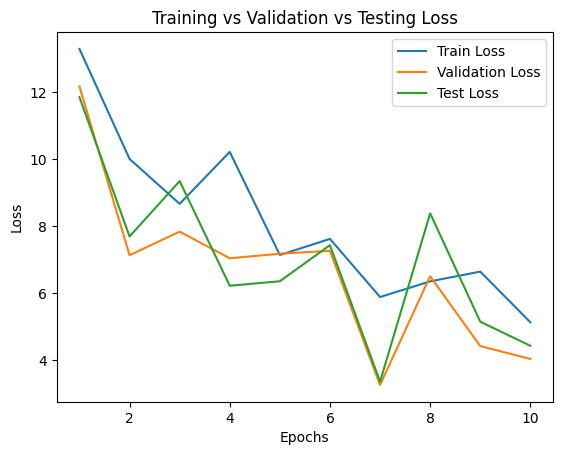

In [ ]:
import matplotlib.pyplot as plt

training_loss = [13.2947, 10.0117, 8.6715, 10.2213, 7.1432, 7.6255, 5.8905, 6.3577, 6.6487, 5.1378]
validation_loss = [12.1762, 7.1388, 7.8410, 7.0474, 7.1830, 7.2694, 3.2671, 6.5107, 4.4259, 4.0424]
testing_loss = [11.8555, 7.6963, 9.3507, 6.2270, 6.3612, 7.4383, 3.3624, 8.3873, 5.1542, 4.4352]

epochs = range(1, 11)

plt.plot(epochs, training_loss, label='Train Loss')
plt.plot(epochs, validation_loss, label='Validation Loss')
plt.plot(epochs, testing_loss, label='Test Loss')

plt.title('Training vs Validation vs Testing Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

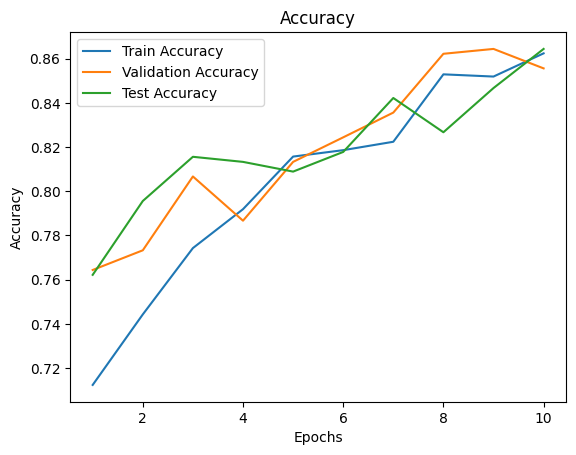

<Figure size 640x480 with 0 Axes>

In [ ]:
train_accuracy = [0.7124, 0.7443, 0.7743, 0.7919, 0.8157, 0.8186, 0.8224, 0.8529, 0.8519, 0.8624]
validation_accuracy = [0.7644, 0.7733, 0.8067, 0.7867, 0.8133, 0.8244, 0.8356, 0.8622, 0.8644, 0.8556]
test_accuracy = [0.7622, 0.7956, 0.8156, 0.8133, 0.8089, 0.8178, 0.8422, 0.8267, 0.8467, 0.8644]

import matplotlib.pyplot as plt

train_accuracy = [0.7124, 0.7443, 0.7743, 0.7919, 0.8157, 0.8186, 0.8224, 0.8529, 0.8519, 0.8624]
validation_accuracy = [0.7644, 0.7733, 0.8067, 0.7867, 0.8133, 0.8244, 0.8356, 0.8622, 0.8644, 0.8556]
test_accuracy = [0.7622, 0.7956, 0.8156, 0.8133, 0.8089, 0.8178, 0.8422, 0.8267, 0.8467, 0.8644]

epochs = range(1, 11)

plt.plot(epochs, train_accuracy, label='Train Accuracy')
plt.plot(epochs, validation_accuracy, label='Validation Accuracy')
plt.plot(epochs, test_accuracy, label='Test Accuracy')

plt.title('Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

plt.savefig('accuracy.png')

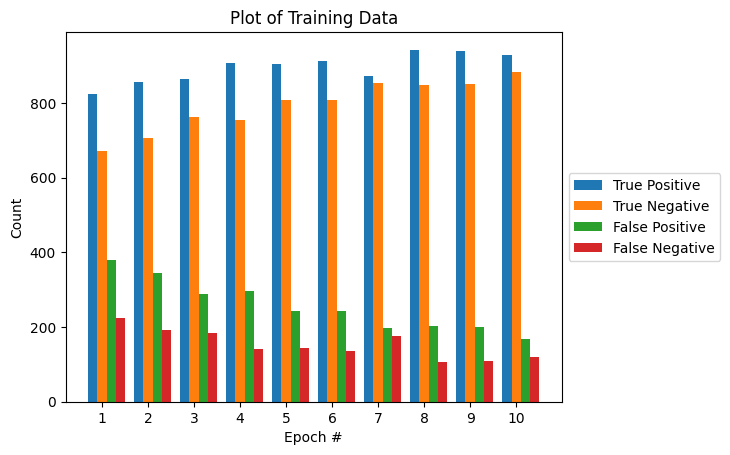

<Figure size 640x480 with 0 Axes>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Your data
train_tp_ = [824, 857, 864, 908, 904, 912, 873, 943, 939, 929]
train_tn_ = [672, 706, 762, 755, 809, 807, 854, 848, 850, 882]
train_fp_ = [379, 345, 289, 296, 242, 244, 197, 203, 201, 169]
train_fn_ = [225, 192, 185, 141, 145, 137, 176, 106, 110, 120]

# Creating the index and width for each bar group
index = np.arange(len(train_tp_))
width = 0.2

# Plotting the bars
fig, ax = plt.subplots()
tp_bars = ax.bar(index, train_tp_, width, label='True Positive')
tn_bars = ax.bar(index+width, train_tn_, width, label='True Negative')
fp_bars = ax.bar(index+(width*2), train_fp_, width, label='False Positive')
fn_bars = ax.bar(index+(width*3), train_fn_, width, label='False Negative')

# Add labels and title
ax.set_xlabel('Epoch #')
ax.set_ylabel('Count')
ax.set_title('Plot of Training Data')

# Add x-axis ticks and legend
ax.set_xticks(index + width)
ax.set_xticklabels(list(range(1, len(train_tp_)+1)))
ax.legend()

ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

# Show the plot
plt.show()

plt.savefig('training data.png')

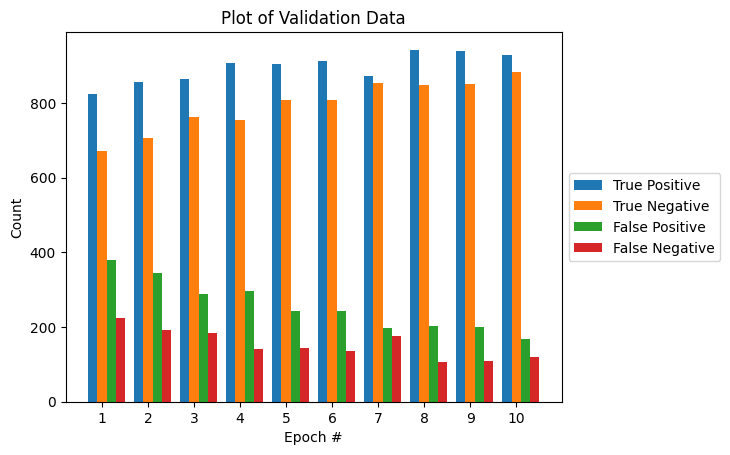

<Figure size 640x480 with 0 Axes>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Your data
validate_tp_ = [216, 190, 212, 177, 197, 201, 179, 212, 209, 194]
validate_tn_ = [128, 158, 151, 177, 169, 170, 197, 176, 180, 191]
validate_fp_ = [91, 61, 68, 42, 50, 49, 22, 43, 39, 28]
validate_fn_ = [15, 41, 19, 54, 34, 30, 52, 19, 22, 37]

# Creating the index and width for each bar group
index = np.arange(len(train_tp_))
width = 0.2

# Plotting the bars
fig, ax = plt.subplots()
tp_bars = ax.bar(index, train_tp_, width, label='True Positive')
tn_bars = ax.bar(index+width, train_tn_, width, label='True Negative')
fp_bars = ax.bar(index+(width*2), train_fp_, width, label='False Positive')
fn_bars = ax.bar(index+(width*3), train_fn_, width, label='False Negative')

# Add labels and title
ax.set_xlabel('Epoch #')
ax.set_ylabel('Count')
ax.set_title('Plot of Validation Data')

# Add x-axis ticks
ax.set_xticks(index + width)
ax.set_xticklabels(list(range(1, len(train_tp_)+1)))

# Move the legend outside the figure
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

# Show the plot
plt.show()

plt.savefig('validation data.png')

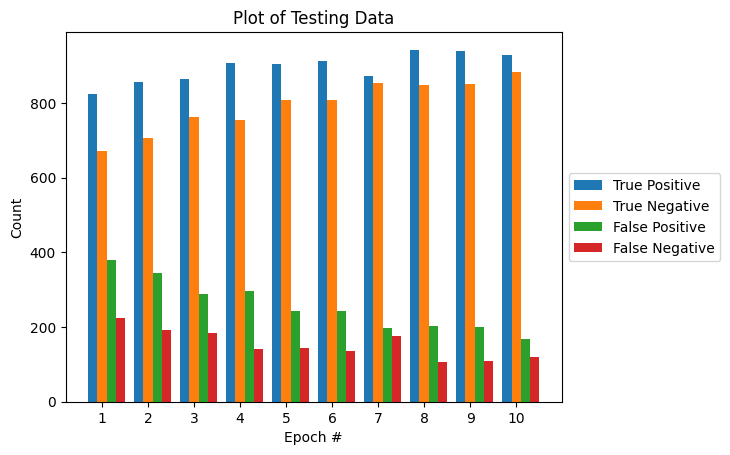

<Figure size 640x480 with 0 Axes>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Your data
test_tp_ = [210, 190, 206, 181, 187, 198, 175, 199, 198, 186]
test_tn_ = [133, 168, 161, 185, 177, 170, 204, 173, 183, 203]
test_fp_ = [97, 62, 69, 45, 53, 60, 26, 57, 47, 27]
test_fn_ = [10, 30, 14, 39, 33, 22, 45, 21, 22, 34]

# Creating the index and width for each bar group
index = np.arange(len(train_tp_))
width = 0.2

# Plotting the bars
fig, ax = plt.subplots()
tp_bars = ax.bar(index, train_tp_, width, label='True Positive')
tn_bars = ax.bar(index+width, train_tn_, width, label='True Negative')
fp_bars = ax.bar(index+(width*2), train_fp_, width, label='False Positive')
fn_bars = ax.bar(index+(width*3), train_fn_, width, label='False Negative')

# Add labels and title
ax.set_xlabel('Epoch #')
ax.set_ylabel('Count')
ax.set_title('Plot of Testing Data')

# Add x-axis ticks
ax.set_xticks(index + width)
ax.set_xticklabels(list(range(1, len(train_tp_)+1)))

# Move the legend outside the figure
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

# Show the plot
plt.show()

plt.savefig('testing data.png')